# Violent Crime Rates by US State

Dataset Name: US Arrests

Dataset Description: This data set contains statistics in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

Attributes Description: 

A data frame with 50 observations on 4 variables.

1. Murder: Murder arrests per 100,000 (numeric)
2. Assault: Assault arrests per 100,000 (numeric)
3. UrbanPop: Percent urban population (numeric)
4. Rape: Rape arrests (per 100,000)

# Step 1: Importing Libraries

In [1]:
# Importing libraries for Visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        
%matplotlib inline                                     
import seaborn as sns   

# Importing Libraries for Clustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Importing Libararies for Performance Measures
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score 

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Importing and Analysing Dataset

In [2]:
# Importing dataset as df
df=pd.read_csv('US Arrests.csv')

In [3]:
# Number of rows and columns of Dataset
df.shape

(50, 5)

In [4]:
# First Five Rows of Dataset
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
# Last five rows of Dataset
df.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [6]:
# Datatypes and missing values count of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
# Five Number Summary of Dataset
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Observations from Dataset Analysis:
1. First Column is Unnamed
2. No missing values in Dataset

# Step 3: Data Visualization

In [8]:
# Defining size of x-axis and y-axis for all plots beforehand
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

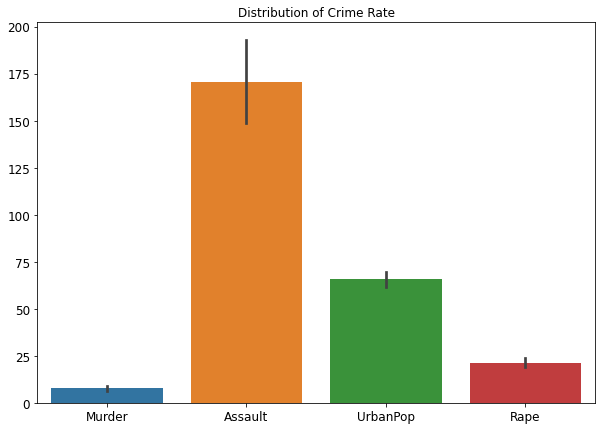

In [9]:
# Distribution of Attributes
plt.figure(figsize=(10,7))
plt.title('Distribution of Crime Rate')
sns.barplot(data=df);

Observations: 
1. Minimum number of crimes in US are of Murder
2. Maximum number of crimes in US are of Assault
3. Rape fall in between

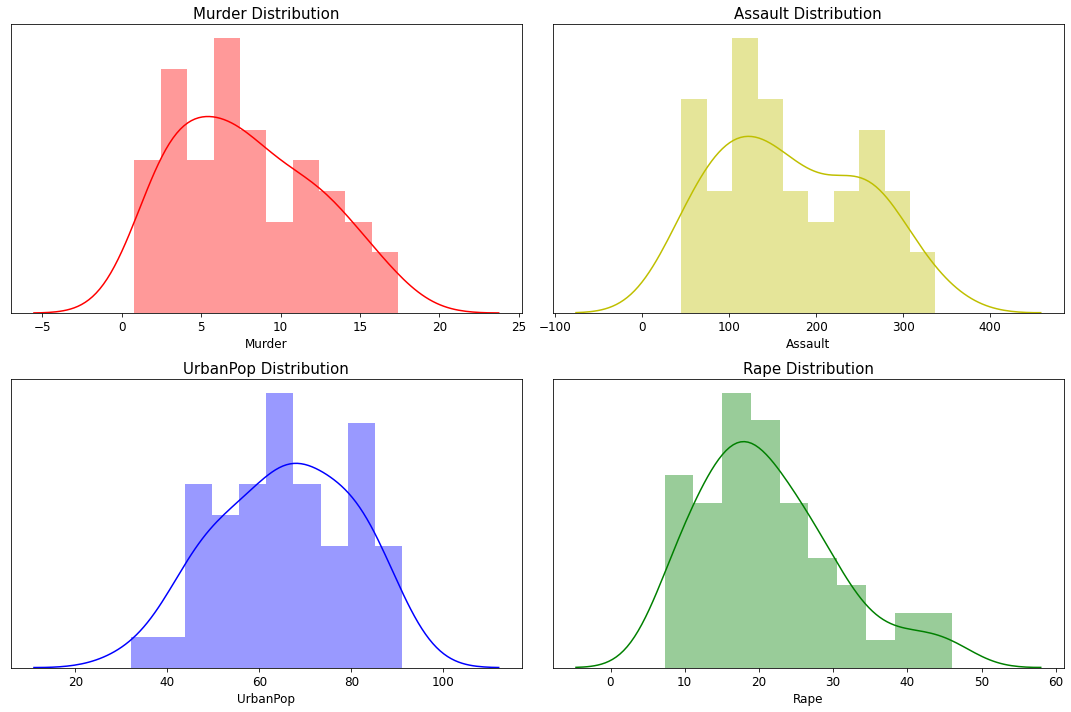

In [10]:
# Distplot for Each Attribute

# Setting up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting a histogram and kernel density estimate for Murder Attribute
sns.distplot(df['Murder'], color="r", bins=10, ax=axes[0, 0])
axes[0,0].set_title('Murder Distribution', size=15)
axes[0,0].set_xlabel('Murder', size=12)

# Plotting a histogram and kernel density estimate for Assault Attribute
sns.distplot(df['Assault'], color="y", bins=10, ax=axes[0, 1])
axes[0,1].set_title('Assault Distribution', size=15)
axes[0,1].set_xlabel('Assault', size=12)

# Plotting a histogram and kernel density estimate for UrbanPop Attribute
sns.distplot(df['UrbanPop'], color="b", bins=10, ax=axes[1, 0])
axes[1,0].set_title('UrbanPop Distribution', size=15)
axes[1,0].set_xlabel('UrbanPop', size=12)

# Plotting a histogram and kernel density estimate for Rape Attribute
sns.distplot(df['Rape'], color="g", bins=10, ax=axes[1, 1])
axes[1,1].set_title('Rape Distribution', size=15)
axes[1,1].set_xlabel('Rape', size=12)

plt.setp(axes, yticks=[])
plt.tight_layout()

Observation:
1. Murder Distribution is right skewed
2. UrbanPop Distribution is left skewed
3. Rape Distribution is right skewed

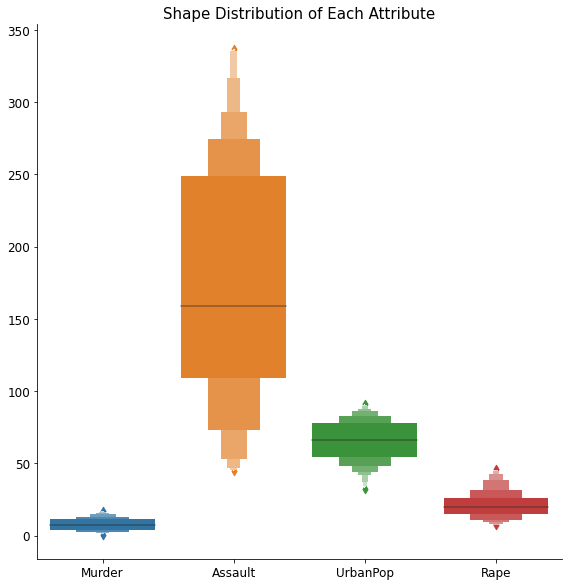

In [11]:
# Shape Distribution of Each Attribute
sns.catplot(kind='boxen', data=df, height=8, aspect=1.0)
plt.title('Shape Distribution of Each Attribute', size=15);

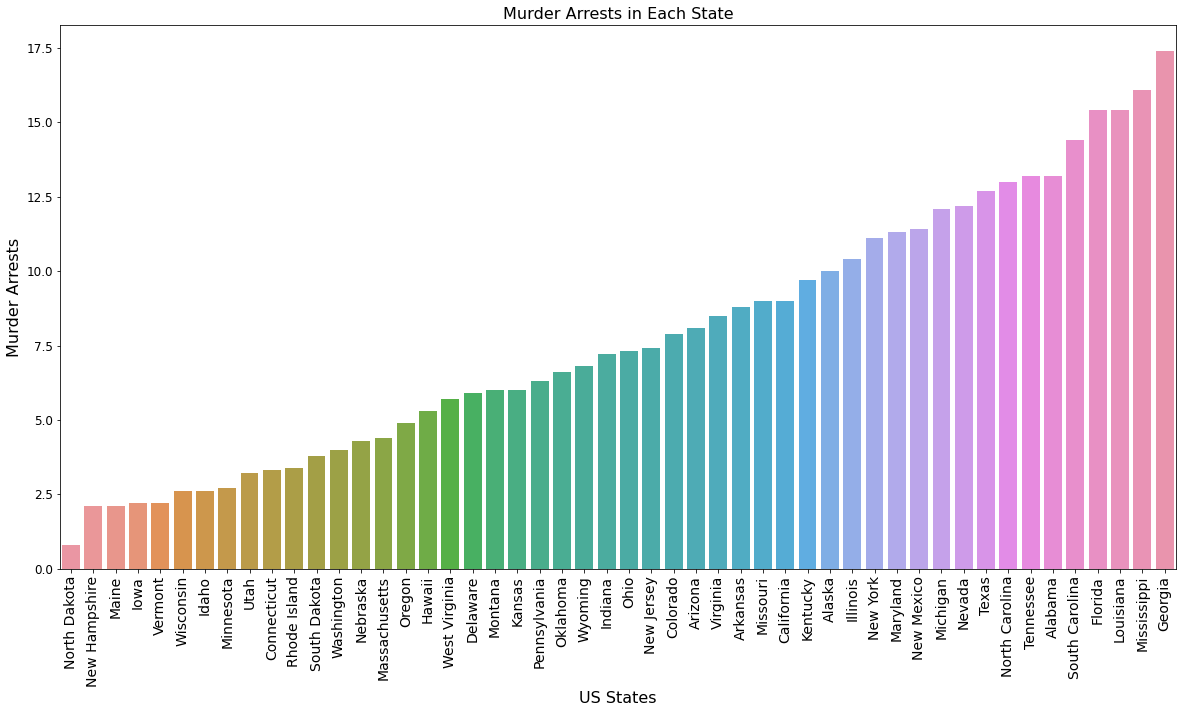

In [12]:
# Murder Distribution of Each State
mu=df[['Unnamed: 0', 'Murder']]
mu=mu.sort_values('Murder')
plt.figure(figsize=(20,10))
chart=sns.barplot(x='Unnamed: 0', y='Murder', data=mu)
plt.title('Murder Arrests in Each State', size=16)
plt.xlabel('US States', size=16)
plt.ylabel('Murder Arrests', size=16)
plt.setp(chart.get_xticklabels(), rotation=90, size=14);

Observation:
1. Maximum Number of Murder Arrests are in Georgia
2. Minimum Number of Murder Arrests are in North Dakota

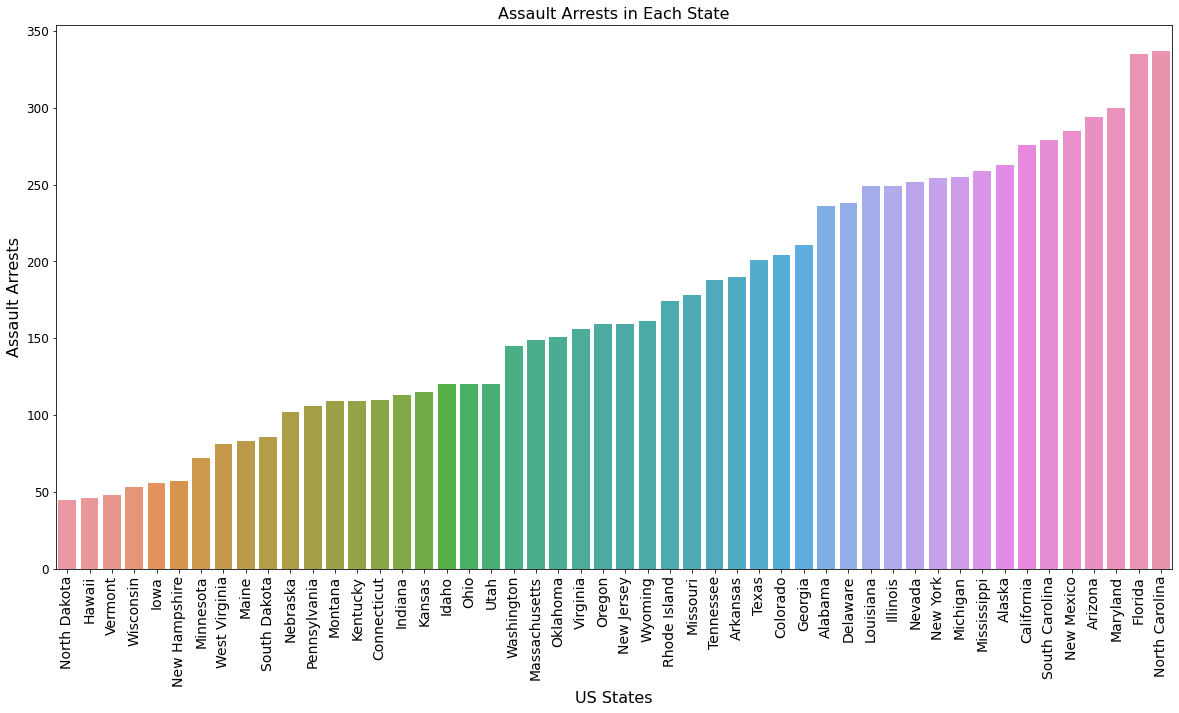

In [13]:
# Assault Distribution of Each State
au=df[['Unnamed: 0', 'Assault']]
au=au.sort_values('Assault')
plt.figure(figsize=(20,10))
chart=sns.barplot(x='Unnamed: 0', y='Assault', data=au)
plt.title('Assault Arrests in Each State', size=16)
plt.xlabel('US States', size=16)
plt.ylabel('Assault Arrests', size=16)
plt.setp(chart.get_xticklabels(), rotation=90, size=14);

Observation:
1. Maximum Number of Assault Arrests are in North Carolina
2. Minimum Number of Assault Arrests are in North Dakota

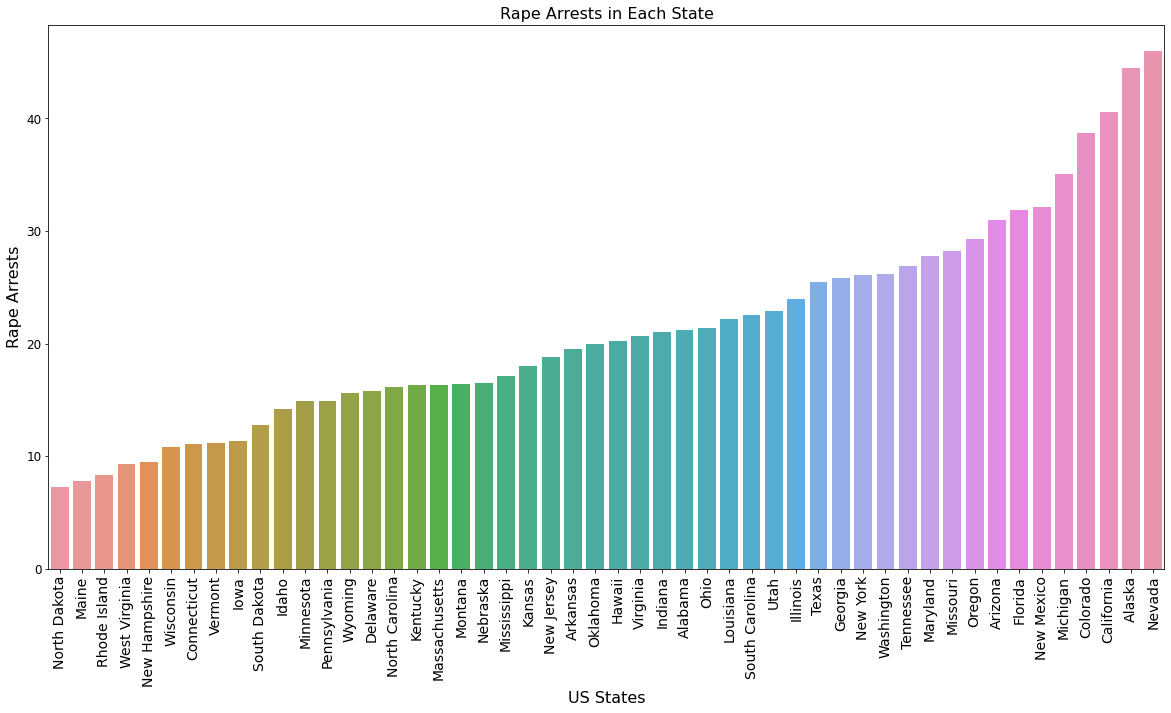

In [14]:
# Rape Distribution of Each State
ru=df[['Unnamed: 0', 'Rape']]
ru=ru.sort_values('Rape')
plt.figure(figsize=(20,10))
chart=sns.barplot(x='Unnamed: 0', y='Rape', data=ru)
plt.title('Rape Arrests in Each State', size=16)
plt.xlabel('US States', size=16)
plt.ylabel('Rape Arrests', size=16)
plt.setp(chart.get_xticklabels(), rotation=90, size=14);

Observation:
1. Maximum Number of Rape Arrests are in Nevada
2. Minimum Number of Rape Arrests are in North Dakota

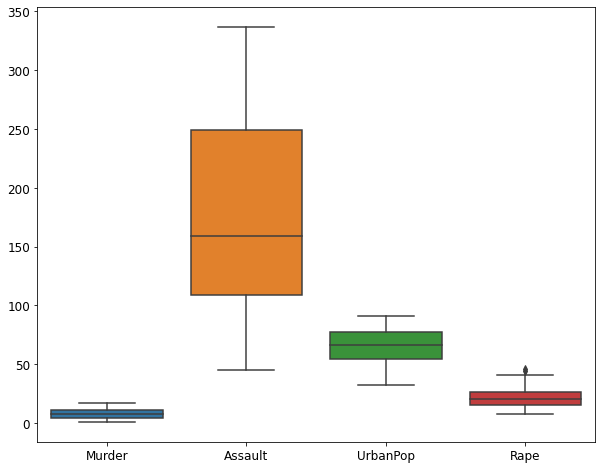

In [15]:
# Boxplot for Dataset
plt.figure(figsize=(10,8))
sns.boxplot(data=df);

Observation:
1. Rape Attribute has outliers   

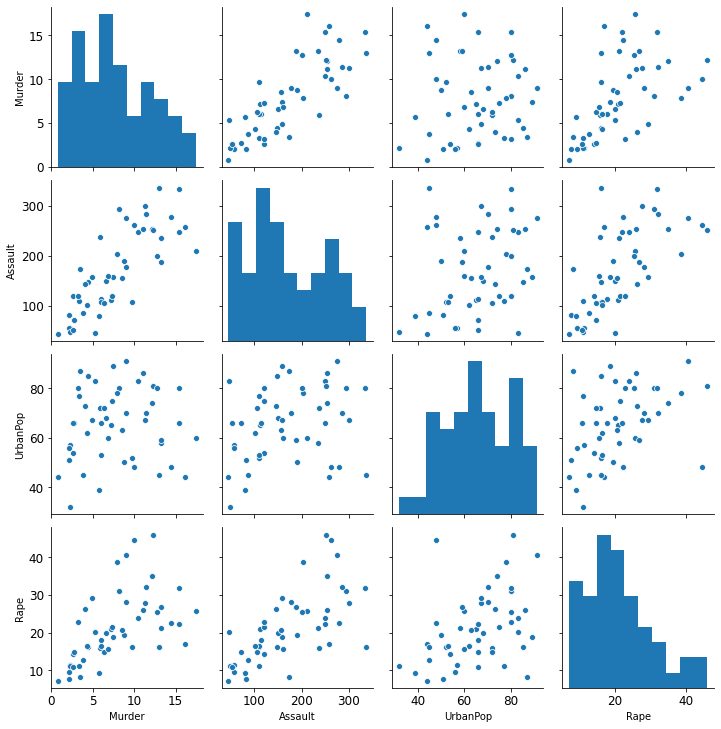

In [16]:
# Pairplot of all Attributes
sns.pairplot(data=df);

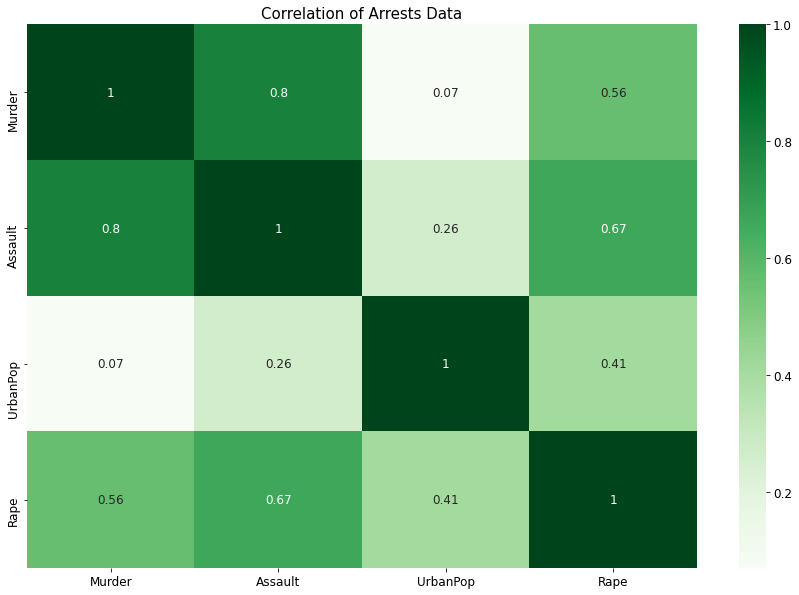

In [17]:
# Correlation of Data
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cmap='Greens', data=corr, annot=True, annot_kws={'size':12})
plt.title('Correlation of Arrests Data', size=15);

1. Murder and Assault have high Correlation (0.8)
2. Assault and Rape have high Correlation (0.67)

# Step 4: Data Preprocessing

Step 4.1: Checking and Correcting Inconsistencies
1. Giving a name to the Unnamed Column
2. Handling Missing Values
3. Handling Outliers

In [18]:
# Naming Unnamed column as US State
df.rename(columns={'Unnamed: 0':'US State'}, inplace=True)
df.columns

Index(['US State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [19]:
# Checking for Missing Values
df.isnull().sum()

US State    0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

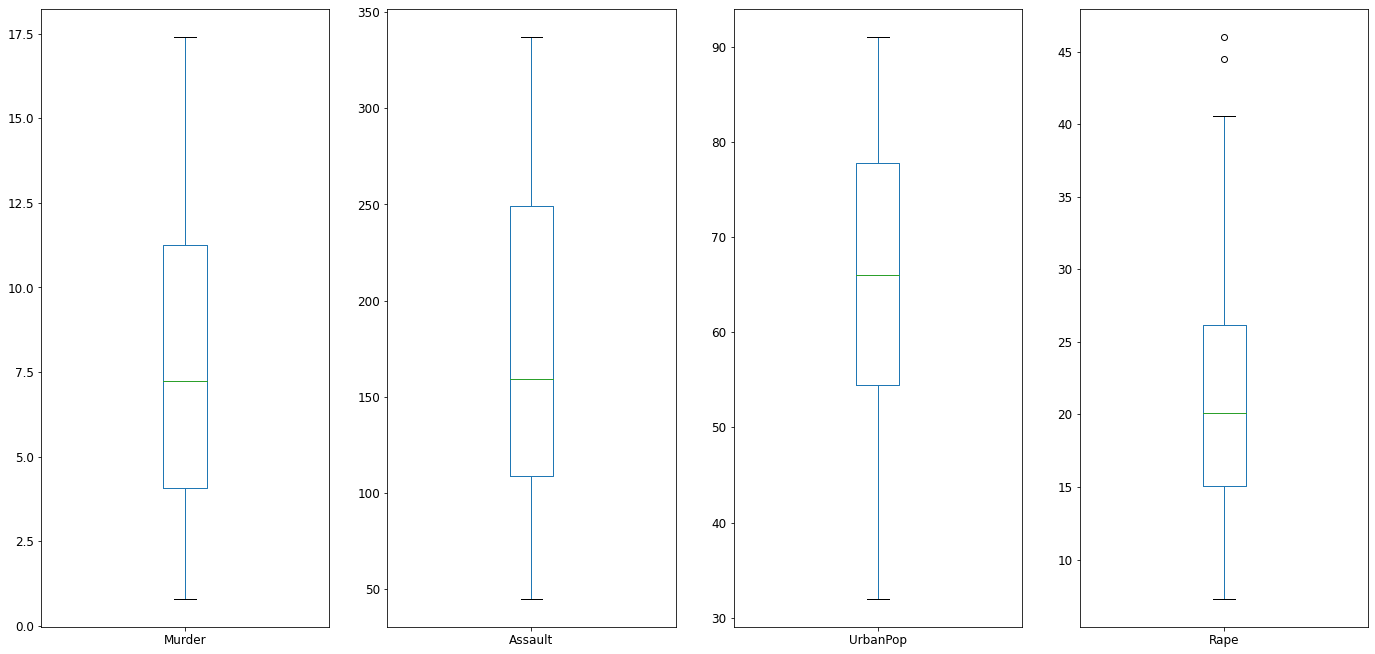

In [20]:
# Checking for Outliers
df.drop('US State',axis=1).plot(kind='box',layout=(2,5),subplots=True,figsize=(30,25))
plt.show()

Observation:
1. Rape Attribute has two Outliers and both outliers are greater than upper whisker   

In [21]:
# Winsorizing Rape Attribute to modify outliers
from scipy.stats.mstats import winsorize
df['Rape']=winsorize(df['Rape'], limits=[0.05, 0.05])

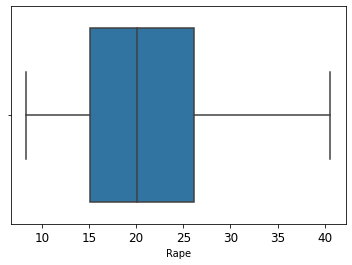

In [22]:
# Rechecking Outliers 
sns.boxplot(df['Rape'])

Conclusion:
1. Unnamed Column has been named as US State
2. There are no missing values in Dataset
2. Outliers in Attribute 'Rape' have been treated

Step 4.2: Selecting Features for Clustering

In [23]:
# Selecting the attributes for clustering (all except attribute 'US State')
data=df.iloc[:,1:].values

Step 4.3: Feature Scaling

In [24]:
# Scaling all values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data)

# KMeans Clustering

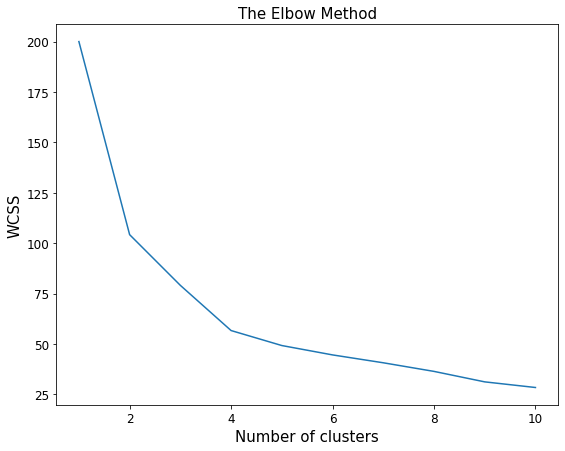

In [25]:
# Using Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10).fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(9,7))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', size=15)
plt.xlabel('Number of clusters', size=15)
plt.ylabel('WCSS', size=15)
plt.show()

Observation:
1. Data can be divided into 2 or 4 number of clusters

# Applying Performance Measures to the Model

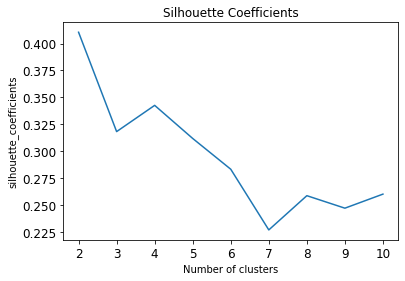

In [26]:
# Silhoutter Coefficient Score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter=300, n_init=10).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
# Silhoutte Coefficient Graph
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.show()

In [27]:
# Performance Measures at 4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Silhoutte Score
kmeans_silhouette = silhouette_score(X, kmeans.labels_)
print('Silhouette Score at 4 clusters: ',kmeans_silhouette)

# DB Index
labels=kmeans.labels_
print('DB Index: ', davies_bouldin_score(X, labels))

Silhouette Score at 4 clusters:  0.34265246218476847
DB Index:  0.9921690602284772


In [28]:
# Performance Measures at 2 clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Silhoutte Score
kmeans_silhouette = silhouette_score(X, kmeans.labels_)
print('Silhouette Score at 2 clusters: ',kmeans_silhouette)

# DB Index
labels=kmeans.labels_
print('DB Index: ', davies_bouldin_score(X, labels))

Silhouette Score at 2 clusters:  0.4104458120007057
DB Index:  0.9631955139010635


Conclusion:
1. Silhoutte score is higher for 2 number of clusters
2. DB Index is lower for 2 clusters

Therefore optimal value of k = 2 and we will plot 2 clusters for our data

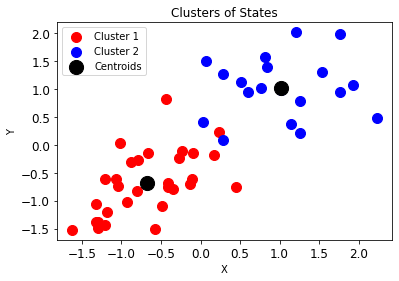

In [29]:
# Visualizing Clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')

plt.title('Clusters of States')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Hierarchical Clustering

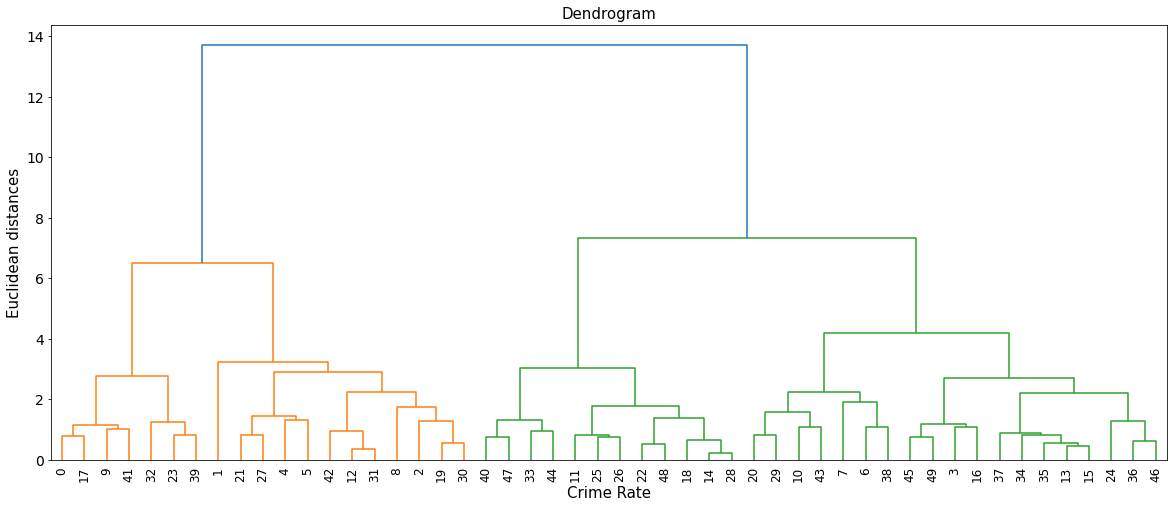

In [30]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xticks(size=12)
plt.yticks(size=14)
plt.title('Dendrogram', size=15)
plt.xlabel('Crime Rate', size=15)
plt.ylabel('Euclidean distances', size=15)
plt.show()

In [31]:
# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

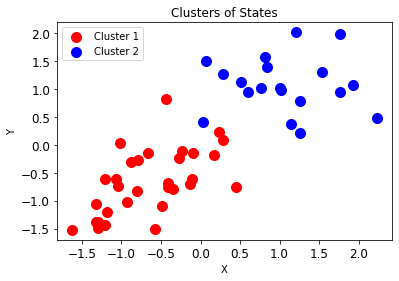

In [32]:
# Visualizing Clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of States')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Results

In [33]:
# Adding cluster value to dataset

#  beginning of  the cluster numbering with 1 instead of 0
y_kmeans1 = y_kmeans+1

# New list called cluster
cluster = list(y_kmeans1)

# Adding cluster to our data set
df['Cluster'] = cluster

In [34]:
# Displaying Average Values of Each Cluster
kmeans_mean_cluster = pd.DataFrame(df.groupby('Cluster').mean())
kmeans_mean_cluster

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
1,4.870,114.433333,63.633333,15.993333
2,12.165,255.250000,68.400000,28.700000


In [35]:
df.head()

,US State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,40.6,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2


# EDA

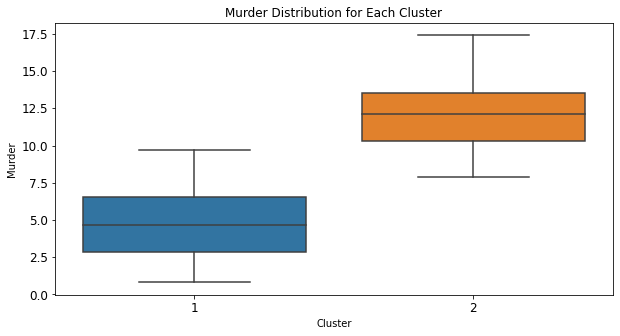

In [36]:
# Murder Distribution for Each Cluster
plt.figure(figsize=(10,5))
sns.boxplot(x='Cluster', y='Murder', data=df)
plt.title('Murder Distribution for Each Cluster');

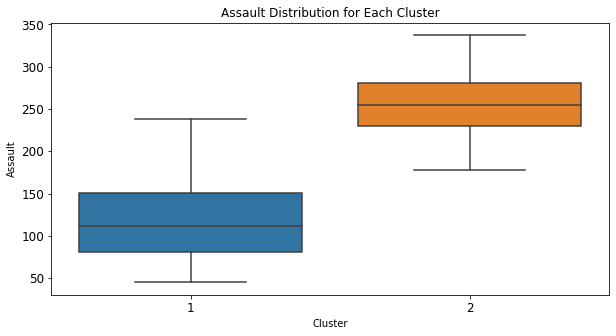

In [37]:
# Assault Distribution for Each Cluster
plt.figure(figsize=(10,5))
sns.boxplot(x='Cluster', y='Assault', data=df)
plt.title('Assault Distribution for Each Cluster');

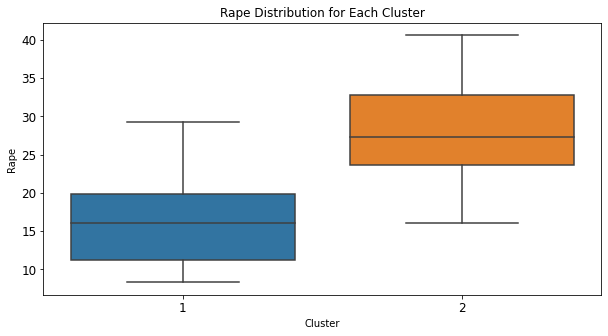

In [38]:
# Rape Distribution for Each Cluster
plt.figure(figsize=(10,5))
sns.boxplot(x='Cluster', y='Rape', data=df)
plt.title('Rape Distribution for Each Cluster');

Observation:

1) Cluster 1 has low cases of Murder Arrests, Assault Arrests and Rape Arrests

Conclusion:
1. Cluster 1 can be defined as Safe Zone 
2. Cluster 2 can be defined as Danger Zone

In [39]:
df['Cluster'].replace({1: 'Safe Zone', 2: 'Danger Zone'}, inplace=True)

In [40]:
df.head()

,US State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,Danger Zone
1,Alaska,10.0,263,48,40.6,Danger Zone
2,Arizona,8.1,294,80,31.0,Danger Zone
3,Arkansas,8.8,190,50,19.5,Safe Zone
4,California,9.0,276,91,40.6,Danger Zone


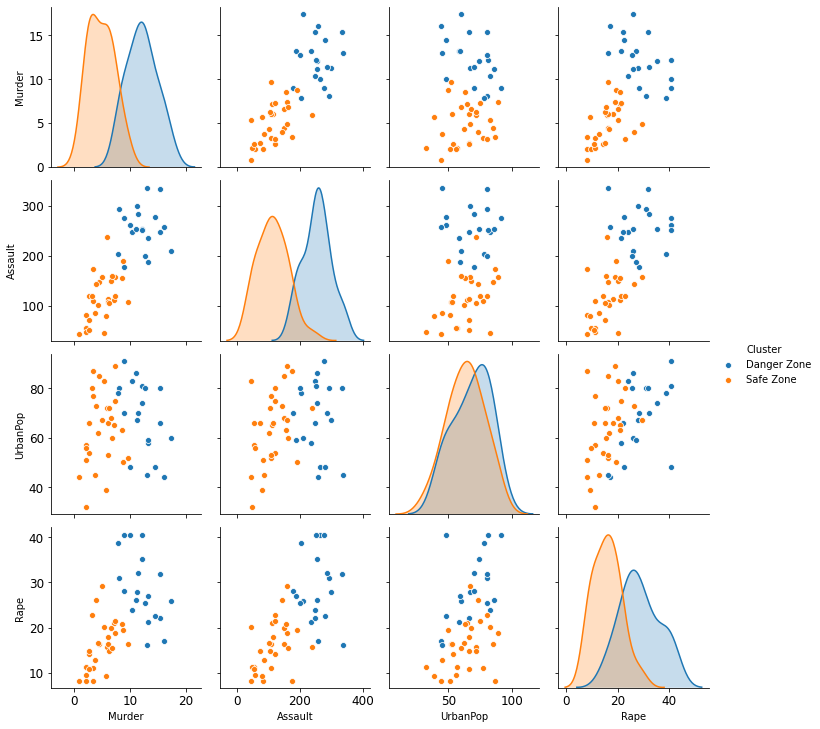

In [41]:
# Relation of all Attributes 
sns.pairplot(data=df, hue='Cluster');

In [42]:
# Exporting new dataset with clusters defined to system (to make maps)
df.to_csv('US Arrests with Cluster Name.csv')

# US States According to Zone Type (Compact Mode)

In [1]:
%%HTML
<div class='tableauPlaceholder' id='viz1598100972086' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;52&#47;52RMGD8TG&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;52RMGD8TG' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;52&#47;52RMGD8TG&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1598100972086');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# US States According to Zone Type (Detailed View)

In [2]:
%%HTML
<div class='tableauPlaceholder' id='viz1598101336167' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;HD&#47;HD4DNJ4S4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='shared&#47;HD4DNJ4S4' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;HD&#47;HD4DNJ4S4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1598101336167');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>